<a href="https://colab.research.google.com/github/MINTS12/ML_labs/blob/main/TP_Graph_NAHLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Graph

## First part : Spectral Graph Theory

In this TP, you will apply what we've seen in the graph neural network course. The TP can be done on [io.ensea.fr](https://io.ensea.fr), on you own computer, or in worst case, on google colab (least prefered).

In the first section of this TP, you will apply spectral filtering on a graph. A set of libraries that you might need is given in the following cell.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import cm

 First, start by generating a graph (any kind) and extract its Laplacian. You may use the [networkx](https://networkx.org/) library to generate a random graph, or directly compute an adjacency matrix. The generated graph do not need to be too big, around 15 nodes should be okay. Remember that the Laplacian L is defined as : $L = D-A$

Also prepare the signal on you graph, by creating the H vector where one node is equal to 1, and the other ones are equal to 0

Finally, draw the graph you generated. To do so, you can use the [drawing](https://networkx.org/documentation/stable/reference/drawing.html) functions of networkx.

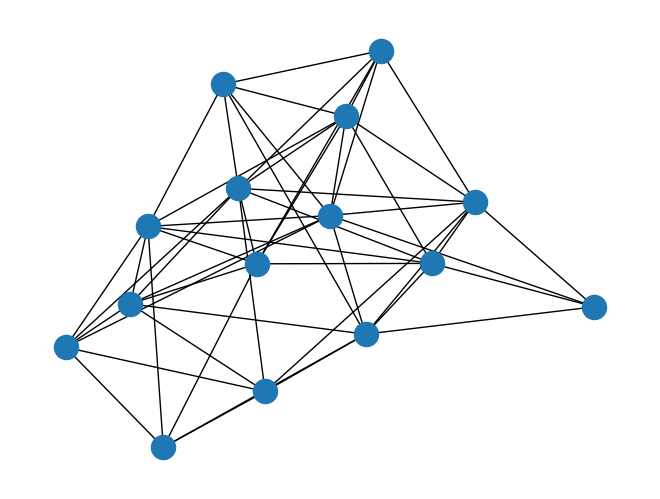

In [2]:
#Generate a random graph with 15 nodes with Erdős–Rényi model put the wiki  link in the report
number_of_nodes = 15
p = 0.5
G = nx.gnp_random_graph(number_of_nodes, p)
nx.draw(G)

We generated a random graph using the Erdős-Rényi model with 15 nodes , and a probability p=0.5 using the function **nx.gnp_random_graph(number of nodes , probability of edge creation)** from the networkX library.

The Erdős-Rényi model constructs a graph by taking n nodes and connecting each possible pair of nodes independantly with a fixed probability p .

Here we chose p=0.5 which means that each node is going to be likely connected to half of the other nodes of the graph . that's why we see a dense graph.

wiki links :

 [Creating the graph](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html#networkx.generators.random_graphs.gnp_random_graph)

 [The Erdős-Rényi model](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model)


 [Drawing the graph](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw)


In [3]:
#Adjacency matrix
A=nx.adjacency_matrix(G)
A

#degree matrix
D=np.diag(np.sum(A,axis=1))
D

array([[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6]])

Then to extract the Laplacian matrix we computed

* The adjacency matrix A  using  [**(nx.
adjacency_matrix(G))**](https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html)


* The degree matrix D : it's a matrix where $d_{ii}= \text{number of neighbors for node i}$ , So to compute it  since the adjacency matrix has one for each connection so we're gonna sum either on the columns or on the rows since the graph is undirected

Then we compute the Laplacian matrix

In [4]:
L=D-A
print("Laplacian Matrix L:\n", L)

Laplacian Matrix L:
 [[ 6  0 -1 -1  0 -1  0 -1  0 -1  0  0 -1  0  0]
 [ 0  7  0  0 -1 -1 -1 -1 -1 -1  0  0 -1  0  0]
 [-1  0  6 -1  0 -1 -1  0 -1  0  0  0 -1  0  0]
 [-1  0 -1  9 -1  0  0 -1 -1 -1 -1  0 -1 -1  0]
 [ 0 -1  0 -1  4  0  0 -1 -1  0  0  0  0  0  0]
 [-1 -1 -1  0  0  9 -1  0 -1  0 -1  0 -1 -1 -1]
 [ 0 -1 -1  0  0 -1  7  0  0 -1 -1 -1 -1  0  0]
 [-1 -1  0 -1 -1  0  0  8 -1  0 -1 -1  0  0 -1]
 [ 0 -1 -1 -1 -1 -1  0 -1  8  0  0  0 -1  0 -1]
 [-1 -1  0 -1  0  0 -1  0  0  8 -1 -1 -1 -1  0]
 [ 0  0  0 -1  0 -1 -1 -1  0 -1  7  0  0 -1 -1]
 [ 0  0  0  0  0  0 -1 -1  0 -1  0  5  0 -1 -1]
 [-1 -1 -1 -1  0 -1 -1  0 -1 -1  0  0  8  0  0]
 [ 0  0  0 -1  0 -1  0  0  0 -1 -1 -1  0  6 -1]
 [ 0  0  0  0  0 -1  0 -1 -1  0 -1 -1  0 -1  6]]


Then we constructed the vector H  which represents the initial node features that will be processed through the spectral filters

In [5]:
H=np.zeros((number_of_nodes))
H[5]=1
H

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**Normalize your Laplacian, compute its eigen decomposition and verify that L = U.diag(lambda).u^T**

**Also plot every matrices (U, diag(lambda) and the Laplacian matrix)**

In [6]:
#the normalized laplacien
D_inv_sqrt=np.diag(1/np.sqrt(np.diag(D)))
L_normalized=np.matmul(np.matmul(D_inv_sqrt,L),D_inv_sqrt)


#the eigen decomposition
eigenvalues, U = np.linalg.eigh(L_normalized)
Lambda = np.diag(eigenvalues)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", U)
print("Diagonal matrix of eigenvalues:\n", Lambda)


Eigenvalues:
 [-5.08365217e-17  5.68214192e-01  6.48763309e-01  8.05173229e-01
  8.18327675e-01  9.44348735e-01  1.00551386e+00  1.02618558e+00
  1.12512756e+00  1.22401900e+00  1.28725267e+00  1.31962814e+00
  1.35551819e+00  1.40319729e+00  1.46873057e+00]
Eigenvectors:
 [[ 0.24019223 -0.20048389 -0.20279075  0.3695728   0.18987795  0.33409284
   0.35160545 -0.34476045  0.17116479  0.1248169  -0.20189145 -0.04772783
  -0.00279934  0.39036022 -0.30650327]
 [ 0.25943726 -0.21448813  0.13981711 -0.54392875  0.02747504 -0.16347964
   0.08260968 -0.29802924  0.11256376  0.0322846   0.4580948  -0.25980452
   0.23711633  0.00456732 -0.31756329]
 [ 0.24019223 -0.29569748 -0.27424514  0.22619085 -0.20442022  0.19739609
  -0.13501361  0.41175821  0.20619733  0.24605384  0.34186927 -0.3330526
  -0.24860649 -0.25856097  0.02131242]
 [ 0.2941742  -0.1264827   0.09593594  0.41534065  0.34751776 -0.22552505
  -0.20022954  0.23996957 -0.0059555  -0.2080039   0.03118424  0.03496796
   0.62648193 -0.0

To apply the spectral filtering we need to find the eigenvectors and eigenvalues of the laplacian matrix  for that we use the built in numpyfunction [linalg.eigh(a, UPLO='L')](https://numpy.org/doc/2.3/reference/generated/numpy.linalg.eigh.html)

In [9]:
#verification if the decomposition is right with the norm

L_reconstructed = U @ Lambda @ U.T

norm_diff = np.linalg.norm(L_reconstructed - L_normalized)

verification= norm_diff < 1e-10

print("Decomposition is correct:", verification)

Decomposition is correct: True


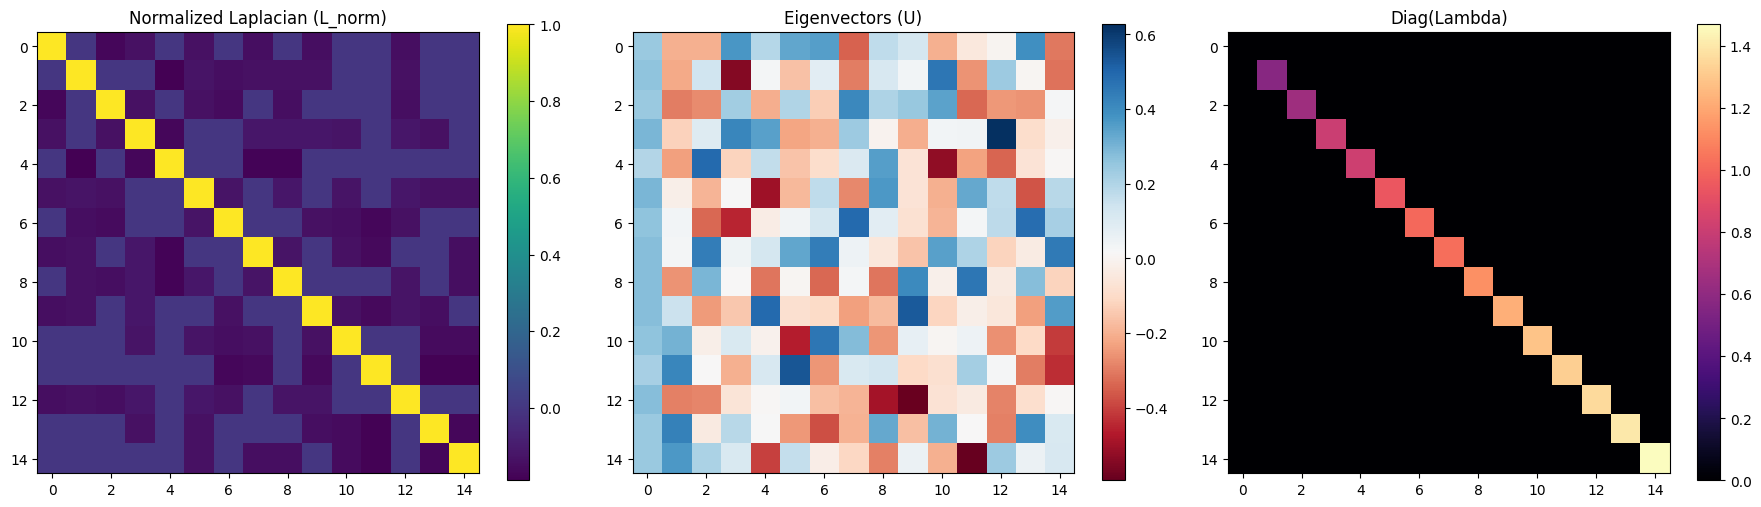

In [10]:
# Plot the matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Laplacian
im1 = axes[0].imshow(L_normalized, cmap='viridis')
axes[0].set_title('Normalized Laplacian (L_norm)')
fig.colorbar(im1, ax=axes[0])

# Eigenvectors
im2 = axes[1].imshow(U, cmap='RdBu')
axes[1].set_title('Eigenvectors (U)')
fig.colorbar(im2, ax=axes[1])

#  Lambda
im3 = axes[2].imshow(Lambda, cmap='magma')
axes[2].set_title('Diag(Lambda)')
fig.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()



*  **Normalized Laplacian :** As expected we can see that diagonal in yellow is near 1 since it represents the degree of the nodes  , and for the squares that are in dark purple represents the -1 that corresponds to the 1 in adjacency matrix . We can also observe that it  is symetrical .
*   **Diagonal Matrix :** We observe that the eigen values are sorted in an increasing order , which will allow us to construct easily the filters


Now we have all the key elements of spectral filtering  ready  



Now filter the eigen value with a low-pass filter, a band-pass filter and a high-pass filter. If you're not sure how to do it, since the eigen values are sorted by ascending order, you may only keep the first ones to produce a low-pass filter, the last ones for an high-pass filter and the middle ones for a band-pass filter.

Finally, plot your graph once again by using the drawing functions of networkx, and make appears the signal on the graph for each filtered signal (with the help of the node_color argument for example). You may also use the [nx_agraph.graphviz_layout](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_agraph.graphviz_layout.html) in order to fix the position of your nodes (and thus to have the same plot for each filtered graph).

Explain what you observe .

In [11]:
FT_H= U.T @ H

#low pass filter
lp_filter = np.zeros(number_of_nodes); lp_filter[:5] = 1
#band pass filter
bp_filter = np.zeros(number_of_nodes); bp_filter[5:10] = 1
#high pass filter
hp_filter = np.zeros(number_of_nodes); hp_filter[10:] = 1


#applying the filters

lp_filtered_signal = U @ (lp_filter * FT_H)
bp_filtered_signal = U @ (bp_filter* FT_H)
hp_filtered_signal = U @ (hp_filter * FT_H)




We executed the complete spectral filtering pipeline through 3   phases

### Fourier Transform

We projected our signal $H$ into the spectral domain

$$\tilde{H} = U^T H$$


### Filters construction   

Since our eigenvalues are sorted

*   Low pass : Selecting  the first $[:5]$
*   Band pass : Selecting indices $[5:10]$
* High pass : Selecting indices $[10:]$


### Filtering and inversing FT
We multiplied the spectral signal by each filter and projected the results back into the spatial domain.

$$\hat{x} = U (g(\lambda) . \tilde{H})$$



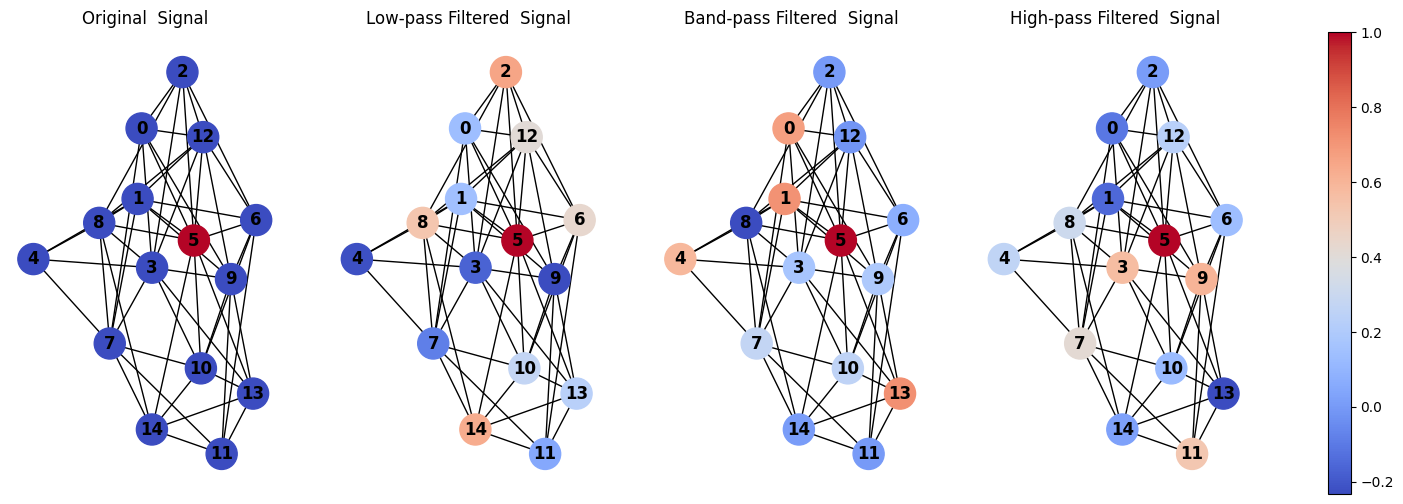

In [19]:
pos = nx.spring_layout(G)


fig, axes = plt.subplots(1, 4, figsize=(20, 6))
filters = [('Original' , H), ('Low-pass Filtered', lp_filtered_signal), ('Band-pass Filtered', bp_filtered_signal), ('High-pass Filtered', hp_filtered_signal)]

for i, (title, filtered_signal) in enumerate(filters):
    nx.draw(G, pos, ax=axes[i], with_labels=True,
            node_color=filtered_signal, cmap=plt.cm.coolwarm,
            node_size=500, font_weight='bold')
    axes[i].set_title(f'{title}  Signal')


plt.colorbar(
    plt.cm.ScalarMappable(
        cmap=plt.cm.coolwarm,
        norm=plt.Normalize(vmin=min(s.min() for _, s in filters), vmax=max(s.max() for _, s in filters))
    ),
    ax=axes.ravel().tolist()
)

plt.show()

In [30]:

hop_lengths = nx.single_source_shortest_path_length(G, 5)


def get_hop_signal(hop_dist):
    sig = np.zeros(number_of_nodes)
    for node, dist in hop_lengths.items():
        if dist == hop_dist:
            sig[node] = 1
    return sig

hop_1 = get_hop_signal(1)
hop_2 = get_hop_signal(2)

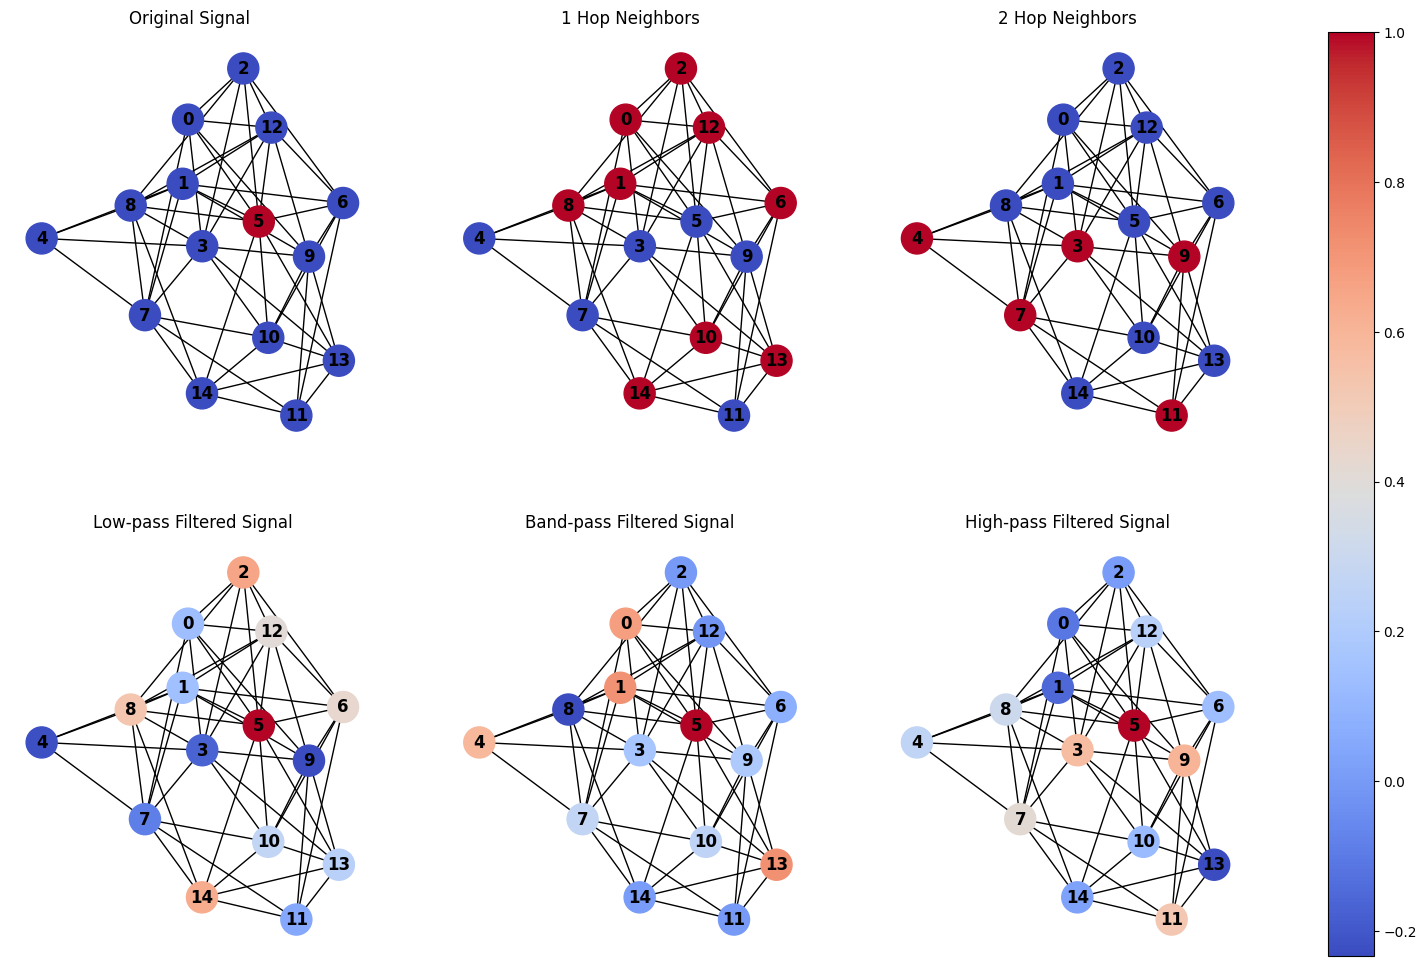

In [29]:

fig, axes = plt.subplots(2, 3, figsize=(20, 12))


structural = [('Original Signal ', H), ('1 Hop Neighbors', hop_1), ('2 Hop Neighbors', hop_2)]
for i, (title, sig) in enumerate(structural):
    nx.draw(G, pos, ax=axes[0, i], with_labels=True, node_color=sig,
            cmap=plt.cm.coolwarm, node_size=500, font_weight='bold')
    axes[0, i].set_title(title)


filtered = [('Low-pass', lp_filtered_signal), ('Band-pass', bp_filtered_signal), ('High-pass', hp_filtered_signal)]
for i, (title, sig) in enumerate(filtered):
    nx.draw(G, pos, ax=axes[1, i], with_labels=True, node_color=sig,
            cmap=plt.cm.coolwarm, node_size=500, font_weight='bold')
    axes[1, i].set_title(f'{title} Filtered Signal')


plt.colorbar(
plt.cm.ScalarMappable(
  cmap=plt.cm.coolwarm,
  norm=plt.Normalize(vmin=min(s.min() for _, s in filters), vmax=max(s.max() for _, s in filters))
    ),
ax=axes.ravel().tolist()
)

plt.show()

To deeply analyze the spatial impact of our spectral filters , i used [nx.single_source_shortest_path_length](https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html) to isolate nodes based on their based on their neigbrhood relation from the node 5 . Then generated refrence plots for 1 hop and 2 hop neighborhoods to compare against the filtered outputs.

* **Low pass filter :** We observe that the 1  hop neighbors go from blue to a pale orange that's because the low pass filter isolate the lowest eigenvalues , which correspond to eigenvectors that change very slowly across edges. Which forces node 5 and its immediate neighbors to converge toward a similar value.



* **Band  pass filter :** We observe that both 1-hop and 2-hop neighborhoods alternate between orange and blue , that's because the band pass filter isolates the  mid range eigenvectors , which are the frequencies that are not too fast and not tooo gradual .

* **High pass filter :** We observe that 1-hop neighbors are dark blue  that's because the high pass filter keep only the largest eigenvalues, which correspond to eigenvectors that oscillate rapidly between adjacent nodes, so that's why it made the 1 hop neighbors the opposite color  of node .



## Second part : Graph Neural Network

In the second part of the TP, you will code you own GNN an apply them on a toy example, the image seen in course. The code that allow to load the image and transform it into a graph is provided to you by the following code. You may find the images on Moodle.

In [12]:
from PIL import Image
import numpy as np

def from_image_to_graph(path_image):
    image = Image.open(path_image)
    im = np.asarray(image)
    row, col = np.shape(im)
    adjacency = np.zeros((row*col, row*col))
    for i in range(row):
        for j in range(col):
            if i > 0:
                if j > 0:
                    adjacency[i * row + j, (i - 1) * row + j - 1] = 1
                adjacency[i * row + j, (i - 1) * row + j] = 1
                if j < col-1:
                    adjacency[i * row + j, (i - 1) * row + j + 1] = 1
            if j > 0 :
                adjacency[i * row + j, i * row + j - 1] = 1
            if j < col-1:
                adjacency[i * row + j, i * row + j + 1] = 1
            if i < row-1 :
                if j > 0:
                    adjacency[i * row + j, (i + 1) * row + j - 1] = 1
                adjacency[i * row + j, (i + 1) * row + j] = 1
                if j < col-1:
                    adjacency[i * row + j, (i + 1) * row + j + 1] = 1
    nodes = []
    for i in range(row):
        nodes = np.concatenate((nodes, im[i,:]))
    nodes = nodes/255

    return nodes, adjacency


You are now going to compute your own Graph Neural Network. For Deep Learning, you may find 2 different libraries in Python : [TensorFlow](https://www.tensorflow.org/?hl=fr) and [PyTorch](https://pytorch.org/). Both of them are based on tensors operations. In general, PyTorch is a little bit simpler to use, and it is probably the most used library between the two of them, mostly in reasearch and development, while TensorFlow is more efficient and scalable but is more demanding in terms of programming. For this TP, you may use either TensorFlow and PyTorch with PyTorch being recommanded. The instructions and advices given in the rest of the TP are mostly designed for PyTorch, but both are pretty similar. Also, for Graph Neural Networks, there is [PyTorch-Geometric](https://pytorch-geometric.readthedocs.io/en/latest/), but it requires to know PyTorch first.

Whatever your choice, develop you own layer and implement a vanilla Graph Neural Network. For TensorFlow, you may find an example on how to implement your own layer [here](https://www.tensorflow.org/api_docs/python/tf/keras/Layer), and for PyTorch, you may go [there](https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html).

As a reminder, the formula for the vanilla GNN is $H^{l+1} = \sigma(AH^lW^l+b^l)$

For the PyTorch users, you can use the [nn](https://pytorch.org/docs/stable/nn.html) module, and define a class that extends the nn.Module class. In this class, you can define the different layers you need in the \_\_init\_\_() function. In our case, you need to define 2 [nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers : one for the GNN, and one for the decision. These layers require 2 arguments : the size of input features, and the size of output features. According to your knowledge, determine both of them.

If the \_\_init\_\_() is used to define the different layers that you need, the forward function is used to define how they are used. This function is pretty simple and straight forward : you reproduce the formula of the vanilla GNN inside. You thus need a matrix multiplication function (torch.matmul) and the linear function make the rest. We won't use the activation function $\sigma$ for the moment.


In [13]:
import torch
import torch.nn as nn

class VanillaGNNLayer(nn.Module):
    def __init__(self, in_features, hidden_feautre_dim, out_features ):
        super(VanillaGNNLayer, self).__init__()
        super().__init__()
        self.linear = nn.Linear(in_features, hidden_feautre_dim)
        self.linear2 = nn.Linear(hidden_feautre_dim, out_features)

    def forward(self, A, H):
        return self.linear2(self.linear(torch.matmul(A, H)))


Now that your model has been defined, you will train your model with only one data : the original image as the input and the filtered image as the output. Instead of generalizing, as we expect when we are doing Machine Learning, we thus want to specialize, and to learn to produce the same output everytime.

In both TensorFlow and PyTorch, you need to define at least three things : an instance of your model the optimizer and the loss function.

The optimizer is the function that allow to find the best weight for the model, while the loss function define what "best" is.

For the loss function, since we are working on a regression problem you will use the Mean Squared Error Loss, and the Adam optimizer.

Finally, load your data and train your model by iterating it n times, and updating the weight each time. Check [here](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html) to have an example.

Plot the resulting images and conclude.

In [16]:
#converting the images to graphes

nodes_input, adjacency_input = from_image_to_graph('input.png')
nodes_output_lp, adjacency_output_lp = from_image_to_graph('low_pass.png')
nodes_output_bp, adjacency_output_bp = from_image_to_graph('band_pass.png')
nodes_output_hp, adjacency_output_hp = from_image_to_graph('high_pass.png')

In [17]:
#converting from numpy to tensors

tensor_nodes_input  = torch.tensor(nodes_input, dtype=torch.float32).unsqueeze(1)
tensor_adjacency = torch.tensor(adjacency_input, dtype=torch.float32).unsqueeze(1)

tensor_nodes_output_lp  = torch.tensor(nodes_output_lp, dtype=torch.float32).unsqueeze(1)

tensor_nodes_output_bp  = torch.tensor(nodes_output_bp, dtype=torch.float32).unsqueeze(1)

tensor_nodes_output_hp  = torch.tensor(nodes_output_hp, dtype=torch.float32).unsqueeze(1)

print(tensor_nodes_input.shape)





torch.Size([9025, 1])


The adjacency matrix is the same for everything because we only filter the image we just filter the images so just we change the values inside the nodes and not the links they remain the same

In [23]:
#Model low pass
model_lp=VanillaGNNLayer(1,32,1)
#Optimizer
optimizer_lp=torch.optim.Adam(model_lp.parameters(), lr=0.01)
#loss_MSE
loss_MSE_lp = torch.nn.MSELoss()


epochs = 200
for epoch in range(epochs):
    model_lp.train()
    optimizer_lp.zero_grad()


    output = model_lp(tensor_adjacency, tensor_nodes_input)


    loss = loss_MSE_lp(output, tensor_nodes_output_bp)


    loss.backward()
    optimizer_lp.step()

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}')

Epoch [50/200], Loss: 0.012045
Epoch [100/200], Loss: 0.008874
Epoch [150/200], Loss: 0.008857
Epoch [200/200], Loss: 0.008857


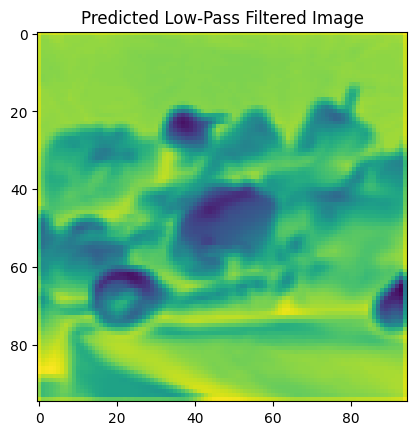

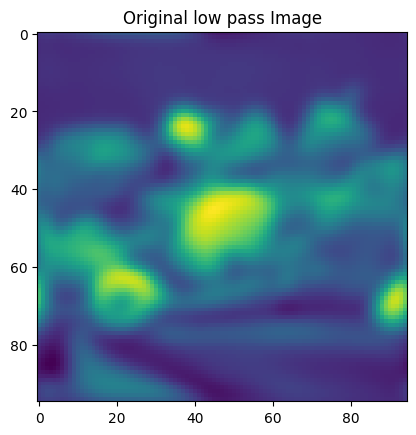

In [25]:
row, col = plt.imread('input.png').shape[:2]
pred_image = output.detach().numpy().reshape(row, col)

plt.imshow(pred_image)
plt.title("Predicted Low-Pass Filtered Image")
plt.show()

image_low_pass = plt.imread('low_pass.png')
plt.imshow(image_low_pass)
plt.title("Original low pass Image")
plt.show()

In [20]:
#Model band pass

model_bp=VanillaGNNLayer(1,32,1)
#Optimizer
optimizer_bp=torch.optim.Adam(model_bp.parameters(), lr=0.01)
#loss_MSE
loss_MSE_bp = torch.nn.MSELoss()


epochs = 200
for epoch in range(epochs):
    model_bp.train()
    optimizer_bp.zero_grad()


    output = model_bp(tensor_adjacency, tensor_nodes_input)


    loss = loss_MSE_lp(output, tensor_nodes_output_bp)


    loss.backward()
    optimizer_bp.step()

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}')





Epoch [50/200], Loss: 0.011694
Epoch [100/200], Loss: 0.008870
Epoch [150/200], Loss: 0.008857
Epoch [200/200], Loss: 0.008857


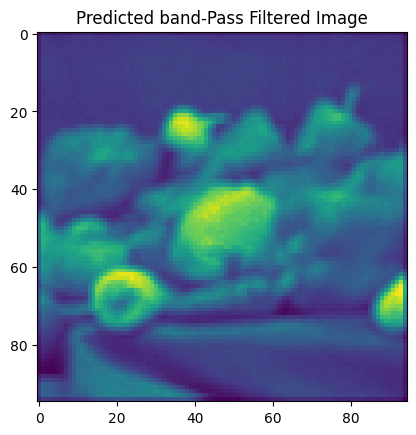

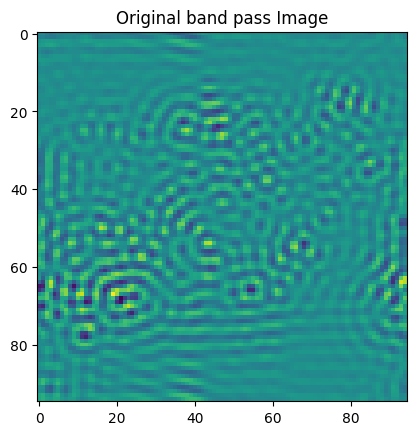

In [28]:
row, col = plt.imread('input.png').shape[:2]
pred_image = output.detach().numpy().reshape(row, col)

plt.imshow(pred_image)
plt.title("Predicted band-Pass Filtered Image")
plt.show()

image_band_pass = plt.imread('band_pass.png')
plt.imshow(image_band_pass)
plt.title("Original band pass Image")
plt.show()

In [27]:
#Model high pass
model_hp=VanillaGNNLayer(1,10,1)
#Optimizer
optimizer_hp=torch.optim.Adam(model_hp.parameters(), lr=0.01)
#loss_MSE
loss_MSE_hp = torch.nn.MSELoss()


epochs = 200
for epoch in range(epochs):
    model_hp.train()
    optimizer_hp.zero_grad()


    output = model_hp(tensor_adjacency, tensor_nodes_input)


    loss = loss_MSE_hp(output, tensor_nodes_output_hp)


    loss.backward()
    optimizer_hp.step()

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}')

Epoch [50/200], Loss: 0.004839
Epoch [100/200], Loss: 0.003440
Epoch [150/200], Loss: 0.003432
Epoch [200/200], Loss: 0.003432


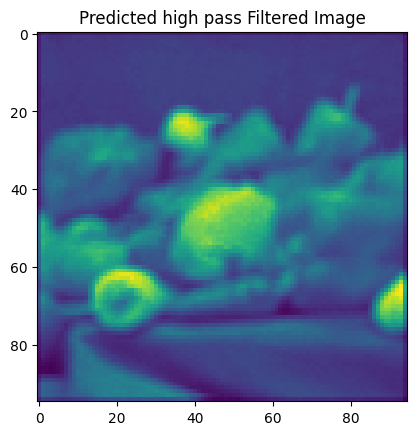

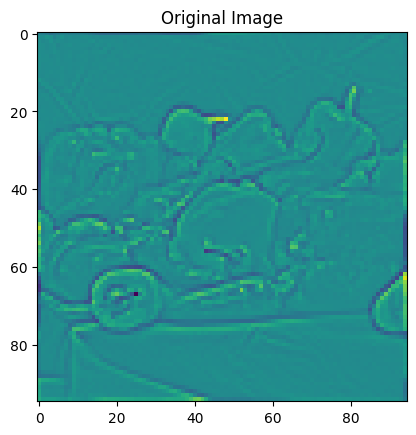

In [29]:
row, col = plt.imread('input.png').shape[:2]
pred_image = output.detach().numpy().reshape(row, col)

plt.imshow(pred_image)
plt.title("Predicted high pass Filtered Image")
plt.show()

image_high_pass = plt.imread('high_pass.png')
plt.imshow(image_high_pass)
plt.title("Original Image")
plt.show()